<h3 style="color:blue;"><b>Healthcare Chatbot – Model Training</b></h3>

<h4 style="color:brown;"><b>About the Project</b></h4>

<p>
This project aims to build a Healthcare Chatbot system that predicts diseases based on user-entered symptoms.
Machine Learning techniques are used to analyze symptom data and classify the most likely disease.
The system also provides disease descriptions and precautionary measures using additional datasets.
The trained model can be deployed using Streamlit for real-time healthcare assistance.
</p>

<h4 style="color:brown;"><b>Dataset</b></h4>

<p>
The project uses multiple CSV files for disease prediction and healthcare recommendations:
</p>

<ul>
<li><b>Training.csv</b> – Used to train the disease prediction model</li>
<li><b>Testing.csv</b> – Used for testing and validation</li>
<li><b>symptom_Description.csv</b> – Contains disease descriptions</li>
<li><b>symptom_precaution.csv</b> – Contains precautionary measures for diseases</li>
<li><b>Symptom_severity.csv</b> – Contains severity scores for symptoms</li>
</ul>

<p>
These datasets together help the system to predict diseases and provide useful healthcare guidance.
</p>

<h4 style="color:purple;"><b>Import Libraries</b></h4>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [24]:
import warnings
warnings.filterwarnings("ignore")

<h4 style="color:purple;"><b>Load Dataset</b></h4>

<p>
The training and testing datasets are loaded using pandas for model training and evaluation.
</p>

In [3]:
train_df = pd.read_csv("data\Training.csv")
test_df = pd.read_csv("data\Testing.csv")

desc_df = pd.read_csv("data\symptom_Description.csv")
precaution_df = pd.read_csv("data\symptom_precaution.csv")
severity_df = pd.read_csv("data\Symptom_severity.csv")

train_df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


<h4 style="color:purple;"><b>Dataset Information</b></h4>

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [5]:
train_df.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [6]:
train_df.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<h4 style="color:purple;"><b>Disease Distribution</b></h4>

<p>
This bar plot shows the number of samples for each disease in the dataset.
</p>

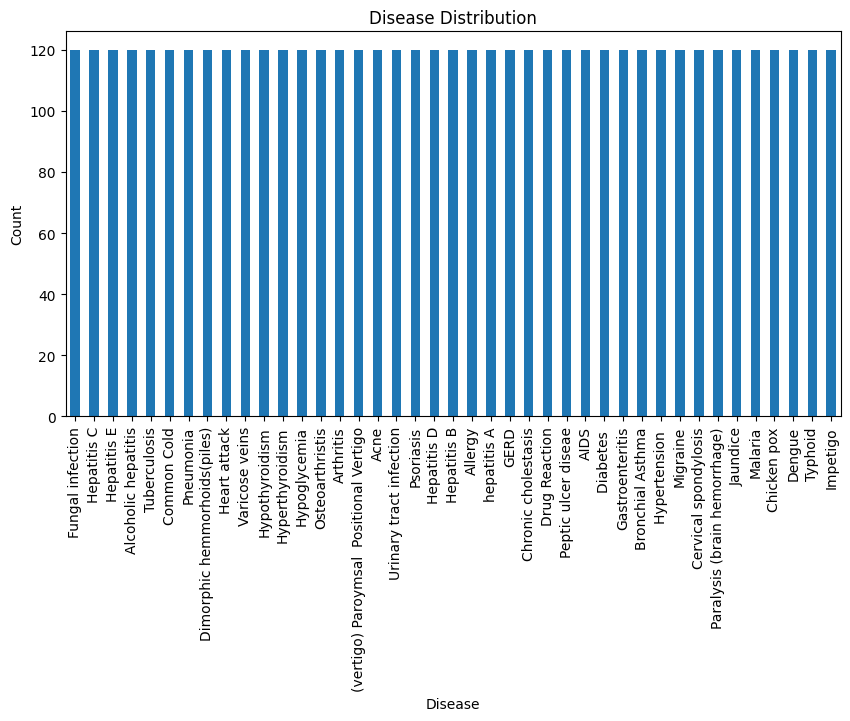

In [8]:
plt.figure(figsize=(10,5))
train_df["prognosis"].value_counts().plot(kind="bar")
plt.title("Disease Distribution")
plt.xlabel("Disease")
plt.ylabel("Count")
plt.show()

<h4 style="color:purple;"><b>Symptom Severity Analysis</b></h4>

In [12]:
severity_df = pd.read_csv("data\Symptom_severity.csv", header=None, names=["symptom", "weight"])
severity_df.head()

,symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5


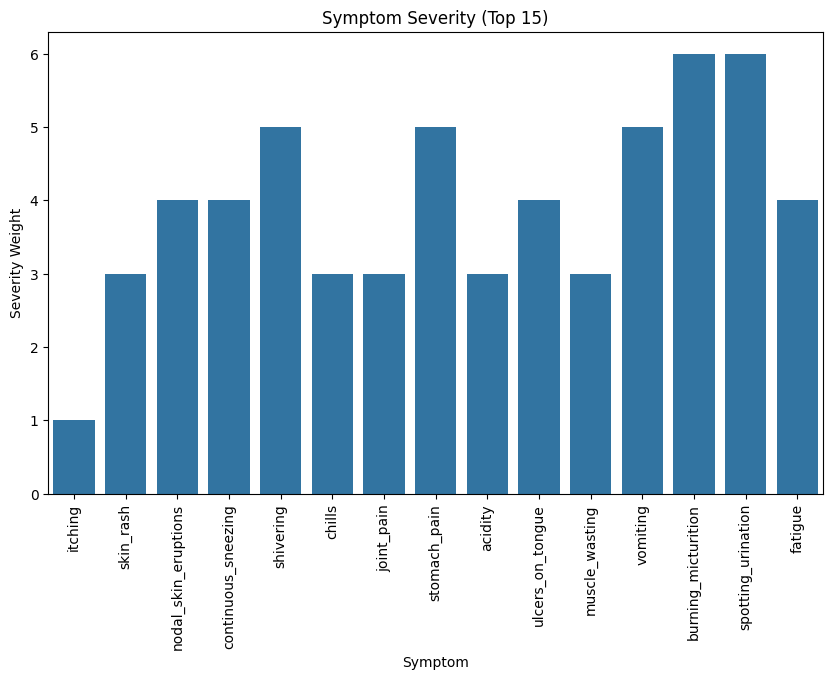

In [13]:
plt.figure(figsize=(10,6))
sns.barplot(x="symptom", y="weight", data=severity_df.head(15))
plt.xticks(rotation=90)
plt.xlabel("Symptom")
plt.ylabel("Severity Weight")
plt.title("Symptom Severity (Top 15)")
plt.show()

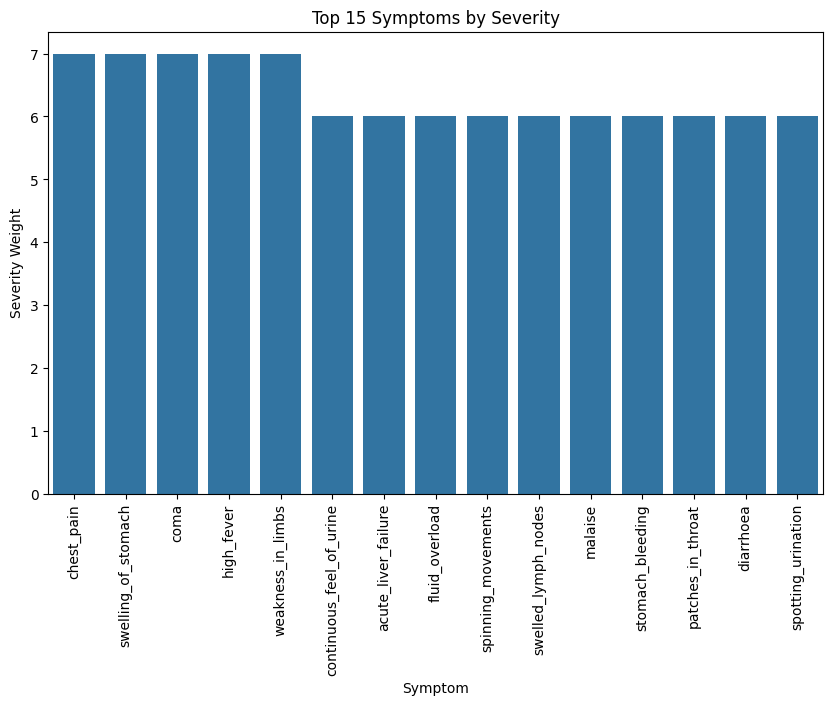

In [14]:
top_symptoms = severity_df.sort_values(by="weight", ascending=False).head(15)

plt.figure(figsize=(10,6))
sns.barplot(x="symptom", y="weight", data=top_symptoms)
plt.xticks(rotation=90)
plt.xlabel("Symptom")
plt.ylabel("Severity Weight")
plt.title("Top 15 Symptoms by Severity")
plt.show()

<h4 style="color:purple;"><b>Feature Selection</b></h4>

In [7]:
X = train_df.drop("prognosis", axis=1)
y = train_df["prognosis"]

print("Number of Features:", X.shape[1])
print("Target Classes:", y.nunique())

Number of Features: 132
Target Classes: 41


<h4 style="color:purple;"><b>Label Encoding</b></h4>

In [15]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

<h4 style="color:purple;"><b>Split Dataset into Training and Testing Sets</b></h4>

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

<h4 style="color:purple;"><b>Model Training (Random Forest Classifier)</b></h4>

In [17]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

<h4 style="color:purple;"><b>Model Evaluation</b></h4>

In [18]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 1.0


In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        33
           7       1.00      1.00      1.00        23
           8       1.00      1.00      1.00        21
           9       1.00      1.00      1.00        15
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        26
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        29
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        19
          16       1.00      1.00      1.00        28
          17       1.00    

<h4 style="color:purple;"><b>Save the Trained Model and Encoder</b></h4>

In [21]:
joblib.dump(model, "disease_model.pkl")
joblib.dump(le, "label_encoder.pkl")

print("Model and Label Encoder saved successfully!")

Model and Label Encoder saved successfully!


<h4 style="color:purple;"><b>Load Model and Test with Sample Input</b></h4>

In [25]:
loaded_model = joblib.load("disease_model.pkl")
loaded_encoder = joblib.load("label_encoder.pkl")

sample_input = X.iloc[0].values.reshape(1, -1)
prediction = loaded_model.predict(sample_input)

predicted_disease = loaded_encoder.inverse_transform(prediction)
print("Predicted Disease:", predicted_disease[0])

Predicted Disease: Fungal infection


<h4 style="color:purple;"><b>Conclusion</b></h4>

<p>
In this project, a Healthcare Chatbot model was successfully trained to predict diseases based on user symptoms.
Visualization techniques helped in understanding disease distribution and symptom importance.
The trained model can be deployed using Streamlit to provide real-time disease prediction and healthcare guidance.
</p>